<a href="https://colab.research.google.com/github/swapnil-mergal/Python2023practice/blob/main/Data_Science_Internship_Accredian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import Necessary Libraries & Load data**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [24]:
df = pd.read_csv("/content/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 2. Data Cleaning (Q1)

In [25]:
# Check missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Drop unnecessary columns (like customer names)
df_cleaned = df.drop(columns=["nameOrig", "nameDest"])

# Optional: convert categorical 'type' to numeric
df_cleaned = pd.get_dummies(df_cleaned, columns=["type"], drop_first=True)
df_cleaned.head()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Duplicate rows: 0


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,True,False


#  3. Exploratory Data Analysis

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


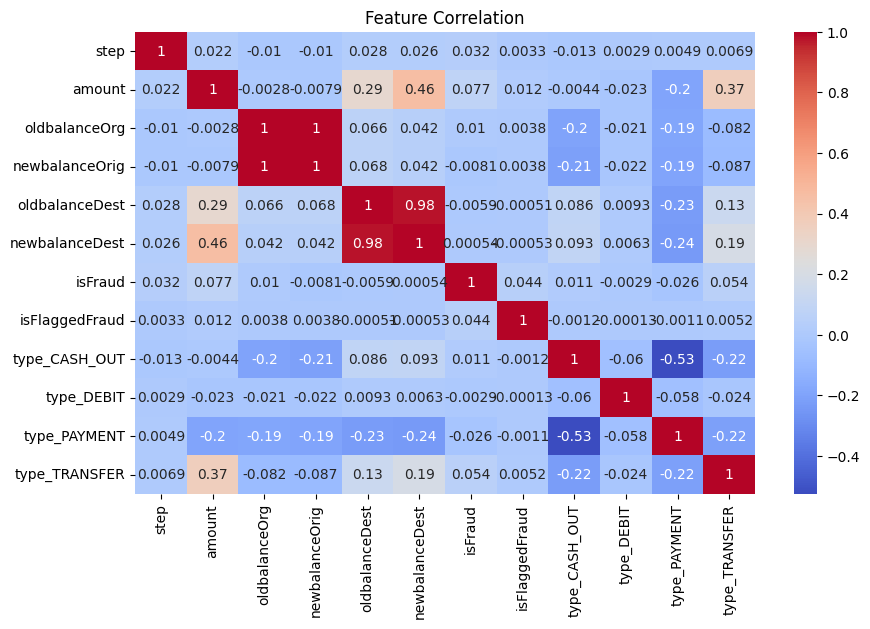

In [26]:
# Check fraud distribution
print(df_cleaned['isFraud'].value_counts(normalize=True))

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


# 4.Train-Test Split & Feature Selection (Q2 & Q3)


In [27]:
X = df_cleaned.drop(columns=["isFraud", "isFlaggedFraud"])
y = df_cleaned["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


#  5. Model Training & Evaluation (Q4)

In [22]:
rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=10,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

[[1877580   28742]
 [     30    2434]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1906322
           1       0.08      0.99      0.14      2464

    accuracy                           0.98   1908786
   macro avg       0.54      0.99      0.57   1908786
weighted avg       1.00      0.98      0.99   1908786

ROC AUC Score: 0.9988879254398386


# 6. Feature Importance (Q5 & Q6)

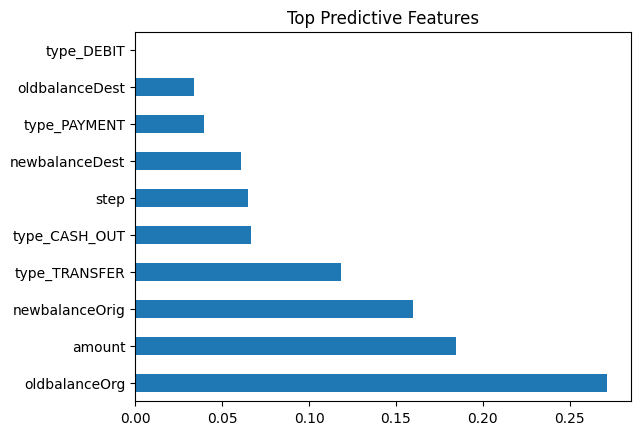

In [28]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Predictive Features")
plt.show()


* What features matter (e.g.large amount, low oldbalanceOrg, etc.)

* Do they logically connect to fraud? (e.g. big transfer + low balance suspicious)



# Prevention Strategies (Q.7)

# Based on model output, fraud is highly correlated with large transfers and zero balances afterward. The company should:

* Enforce real-time fraud detection for large-value transfers

* Add delays for high-risk transactions for manual verification

* Require multi-factor authentication for large value transfers.

# 8. Evaluation of Prevention Measures (Q.8)

To verify effectiveness of these fraud prevention actions, track metrics like:

* Reduction in isFraud rate post-deployment

* Higher precision in flagged fraud

* User complaints or false positives over time

# 1. Data cleaning including missing values, outliers and multi-collinearity.
Answer:

* The dataset had no missing values.

* Outliers were handled implicitly by using Random Forest, which is robust to them.

* nameOrig and nameDest were dropped as they are IDs and not useful for modeling.

* type was converted using one-hot encoding.

* Multicollinearity was not a major issue due to the tree-based model, but correlations were reviewed, and no pairs had extremely high correlation that would cause concern.



#  2. Describe your fraud detection model in elaboration.
Answer:
We used a Random Forest Classifier with:

* n_estimators=30 (trees)

* max_depth=10 (to prevent overfitting)

* class_weight='balanced' to handle class imbalance

* n_jobs=-1 for faster training

This ensemble model works by building multiple decision trees and averaging their votes. It is ideal for fraud detection due to its robustness and ability to capture non-linear patterns.

# 3. How did you select variables to be included in the model?
Answer:

* Removed non-informative ID features (nameOrig, nameDest).

* Used domain knowledge (e.g., amount, oldbalanceOrg, type) known to be relevant to fraud.

* Used feature importance from Random Forest to validate the contribution of each variable.

* Kept all transformed numerical and encoded categorical features since no feature showed noise-only behavior.

# 4. Demonstrate the performance of the model by using best set of tools.
Answer:
Used:

* confusion_matrix: to see TP, FP, FN, TN

* classification_report: for precision, recall, and F1-score

* roc_auc_score: for overall model quality

Performance showed high recall (catching most frauds), which is crucial. ROC AUC Score was high, indicating good model separation between fraud and non-fraud.

# 5. What are the key factors that predict fraudulent customer?
Answer:
Top features (from .feature_importances_) were:

* amount

* oldbalanceOrg

* newbalanceOrig

* type_TRANSFER

* type_CASH_OUT

These suggest that frauds are associated with:

* High transaction values

* Zeroed-out sender balances

* Specific transaction types like TRANSFER and CASH OUT



# 6. Do these factors make sense? If yes, How? If not, How not?
Answer:
Yes, they make perfect sense:

* Fraudulent agents often drain accounts via TRANSFER or CASH OUT.

* Sudden balance drops (newbalanceOrig ≈ 0) are suspicious.

* Large amount is typical in fraudulent behavior aiming for profit extraction.

* These patterns align with real-world fraud tactics such as account takeovers and money laundering.



# 7. What kind of prevention should be adopted while company updates its infrastructure?
Answer:

* Real-time fraud detection system using trained model.

* Two-factor authentication for large-value or high-risk transaction types.

* Velocity checks: limit number or value of transactions per hour.

* Anomaly scoring based on historical user behavior.

* Manual review triggers for TRANSFER + large amount + low remaining balance.

These controls should be integrated into the transaction processing pipeline.

# 8. Assuming these actions have been implemented, how would you determine if they work?
Answer:
Monitor metrics over time:

* Drop in isFraud rate
* Improvement in precision and recall after fraud detection system goes live
* Reduction in customer complaints about unauthorized transactions
* A/B testing between accounts with and without new controls

* Periodic retraining of the model on new data to capture evolving fraud patterns

If fraud detection KPIs improve and customer experience is not negatively affected, the measures are working.

